# Big Data & Data Analytics

## Atividade 4 - Atividades sobre pré-processamento (Dupla)

Aluno: Luís Felippe Tomazini Fernandes

## 1. 
Diferencie variáveis nominais x variáveis discretas x variáveis contínuas. Dê pelo menos um exemplo de cada.

R: 
1. Variáveis nominais são variaveis que espressão atributos, não possuindo 'ordem' (hierarquia). Ex: sexo, etnia e estado civil

2. Variáveis discretas: São variaveis que números inteiros, que podem ou não ser finito, tendo o sentido de contagem. Ex: numero de residentes numa casa, quantas faltas na aula.

3. Variáveis contínuas: São variáveis que são números reais, que podem ou não ser finito, tendo o sentido de medição, mas possui ordem. Ex: Temperatura, umidade do ar.

## 2. 
Qual a principal diferença entre segmentação e eliminação direta?

R: A difrença entre segmentação e eliminação direta, é o motivo da seleção de colunas. Na segmentação é selecionado as colunas que se deseja utilizar, ao contrário da eliminação as colunas selecionadas são as que não serão utilizadas.

##3.  
Ao tratar dados faltantes, por que pode não ser interessante utilizar a técnica de exclusão?

R: A exclusão de toda uma linha de dados pode causar mudança nos dados estátisticos que pode influenciar negativamente o treinamento do modelo, desviando muito da realidade. Quando se possui uma grande base de dados, a exclusão poderá afetar pouco o modelo.

## 4. 
Caso opte-se por uma técnica mais conservadora, como imputação de medidas estatísticas, por que é "melhor" utilizar a média no lugar da mediana?

R: É melhor usar a média, pois a mediana pode acabar modificando a média, mudando todas as outras métricas estatísticas. Ao usar a média para completar um dado a própria mádia não é alterada, mnantendo as outras métricas.

## 5.
Em uma representação 1-de-N, como ficaria a tabela a seguir?

|Cidade|
|:---:|
|Caçador|
|Videira|
|Santa Cecília|


R: 

|Cidade       |Cidade Caçador| Cidade Videira| Cidade Santa Cecília|
|:-----------:|:------------:|:-------------:|:-------------------:|
|Caçador      |      1       |      0        |           0         |
|Videira      |      0       |      1        |           0         |
|Santa Cecília|      0       |      0        |           1         |


## 6. 
Diferencie a normalização linear da normalização por desvio padrão.

R: A noramlização linear é utilizada quando os valores mínimos e máximos esta dentro do conjunto de dados analizados. A nomalização por desvio padrão se utiliza quando não se tem a certeza da presença dos valores mínimo e máximo dentro do conjunto.

##7.

Trate os dados obtidos de [Titanic - Machine Learning from Disaster | Kaggle](https://www.kaggle.com/c/titanic/data?select=train.csv), utilizando as técnicas aprendidas em aula, de forma que todos os valores resultantes sejam numéricos. Remova as colunas que achar necessário, porém justifique cada ação que você tomar. A resposta deverá ser o link para o Colab.

In [376]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/EutruTepit/BigData2022/main/datasets%20bdda/train.csv')

df.info()

# Documentação aponta que Survived é boll
df["Survived"] = df[["Survived"]].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

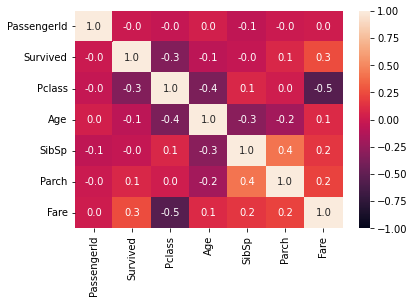

In [377]:
sns.heatmap(df.corr(), vmin=-1, annot=True, fmt=".1f");

In [378]:
# O nome dos passageiros não importa
df.pop('Name')
# O numeor do ticket é inutil (existe a presença do pclass 'qual classe' é o pasageiro)
df.pop('Ticket')
# O portão onde embarcou não faz diferença
df.pop('Embarked')
df.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,False,3,male,22.0,1,0,7.2500,NaN
1,2,True,1,female,38.0,1,0,71.2833,C85
2,3,True,3,female,26.0,0,0,7.9250,NaN
3,4,True,1,female,35.0,1,0,53.1000,C123


In [379]:
# Verificação de dados faltantes
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
dtype: int64

In [380]:
# As cabines né é possivel tratar de nenhuma forma, e não informar nada de novo (é possivel saber a região de "residência" pela pclass) necessário a exlusão
df.pop('Cabin')
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [381]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [382]:
# Fare (Mapeamento de intervalo)

df['Fare'].describe()

# Fare com 0 susponho que é tripulante
def converte_fare(x):
    if 0 == x:
        return "gratuito"
    
    if x < 8:
        return "pouco"

    if x < 15:
        return "medio"

    return "muito" 

df["Fare_conv"] = df["Fare"].apply(converte_fare)
df.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_conv
0,1,False,3,male,22.0,1,0,7.2500,pouco
1,2,True,1,female,38.0,1,0,71.2833,muito
2,3,True,3,female,26.0,0,0,7.9250,pouco
3,4,True,1,female,35.0,1,0,53.1000,muito


In [383]:
df['Fare_intervalo'] = df['Fare_conv'].map({
    "gratuito": 0,
    "pouco": 1,
    "medio": 2,
    "muito": 3
})

df.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_conv,Fare_intervalo
0,1,False,3,male,22.0,1,0,7.2500,pouco,1
1,2,True,1,female,38.0,1,0,71.2833,muito,3
2,3,True,3,female,26.0,0,0,7.9250,pouco,1
3,4,True,1,female,35.0,1,0,53.1000,muito,3


In [384]:
def converte_sex(x):
    if x == "male":
        return 0
    return 1

df["Sex_conv"] = df["Sex"].apply(converte_sex)
df.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_conv,Fare_intervalo,Sex_conv
0,1,False,3,male,22.0,1,0,7.2500,pouco,1,0
1,2,True,1,female,38.0,1,0,71.2833,muito,3,1
2,3,True,3,female,26.0,0,0,7.9250,pouco,1,1
3,4,True,1,female,35.0,1,0,53.1000,muito,3,1


In [385]:
# Mantendo um backup dos dados antigos (Pré tratamento de Age)
df_antigo = df.copy()

# retirando o restante das colunas contendo objeto
df.pop('Sex')
df.pop('Fare_conv')

df.head(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_intervalo,Sex_conv
0,1,False,3,22.0,1,0,7.2500,1,0
1,2,True,1,38.0,1,0,71.2833,3,1
2,3,True,3,26.0,0,0,7.9250,1,1
3,4,True,1,35.0,1,0,53.1000,3,1


### Boxplot

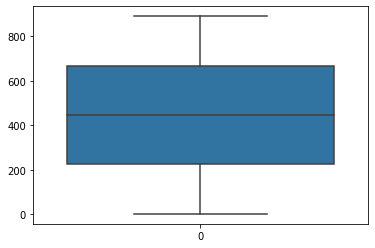

In [386]:
sns.boxplot(data=df['PassengerId']);

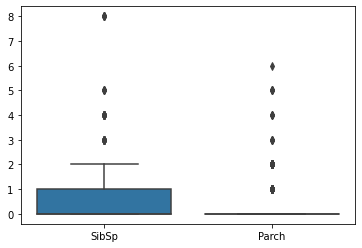

In [387]:
sns.boxplot(data=df[['SibSp',	'Parch']]);

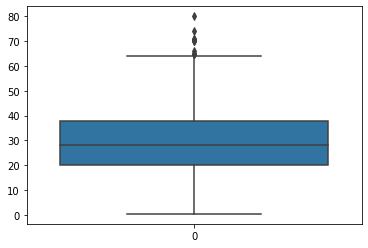

In [388]:
sns.boxplot(data=df['Age']);

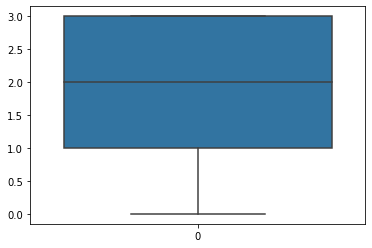

In [389]:
sns.boxplot(data=df['Fare_intervalo']);

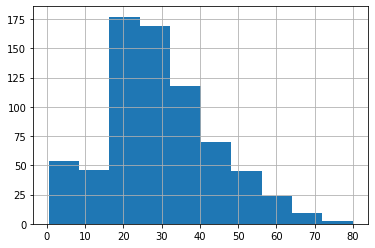

In [390]:
df['Age'].hist();

In [391]:
# Tentar encontrar a melhor forma de lidar com a idade, usar novas copias do df para tentar achar um ponto onde
# não seja agressivo nos intervalos interquartis
df_ = df.copy()
df_const = df.copy()
df_sem = df.copy()

#### Tratamento com a média

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Fare_intervalo,Sex_conv
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,2.199776,0.352413
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,0.876946,0.477990
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,3.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


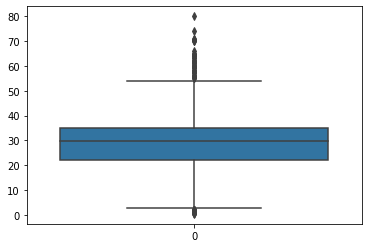

In [392]:
# df_ usando a média (Acredito que seja melhor decisão mesmo interferindo nos intervalos interquartis)
df_['Age'] = df_['Age'].fillna(df_['Age'].mean())
sns.boxplot(data=df_['Age']);
df_.describe()

#### Tratamento com substituição com valores arbritários

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Fare_intervalo,Sex_conv
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,28.765623,0.523008,0.381594,32.204208,2.199776,0.352413
std,257.353842,0.836071,13.136649,1.102743,0.806057,49.693429,0.876946,0.477990
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,3.000000,25.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,3.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


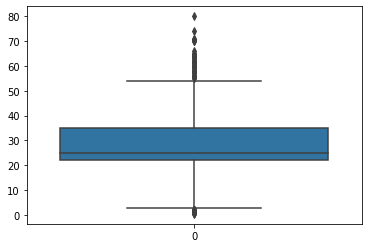

In [393]:
# df_const, substituir por uma constante, valor arbritário observando o resutado do discribe (Não acho que seja a melhor decisão)
df_const['Age'] = df_const['Age'].fillna(25)
sns.boxplot(data=df_const['Age']);
df_const.describe()

Os 2 tratamentos acima passam a considerar os bebês com menos de 1 ano outliers.

#### Tratamento com exclusão completa da coluna

In [394]:
# Apagando completamente a coluna Age, (Imagino que será a pior decisão possível)
df_sem.pop('Age')
df_sem.describe()

,PassengerId,Pclass,SibSp,Parch,Fare,Fare_intervalo,Sex_conv
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.523008,0.381594,32.204208,2.199776,0.352413
std,257.353842,0.836071,1.102743,0.806057,49.693429,0.876946,0.477990
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,3.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,3.000000,1.000000,0.000000,31.000000,3.000000,1.000000
max,891.000000,3.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [395]:
print("df:")
df.info()

df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    bool   
 2   Pclass          891 non-null    int64  
 3   Age             714 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Fare_intervalo  891 non-null    int64  
 8   Sex_conv        891 non-null    int64  
dtypes: bool(1), float64(2), int64(6)
memory usage: 56.7 KB


In [396]:
print("df_const:")
df_const.info()

df_const:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    bool   
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Fare_intervalo  891 non-null    int64  
 8   Sex_conv        891 non-null    int64  
dtypes: bool(1), float64(2), int64(6)
memory usage: 56.7 KB


In [397]:
print("df_sem:")
df_sem.info()

df_sem:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    bool   
 2   Pclass          891 non-null    int64  
 3   SibSp           891 non-null    int64  
 4   Parch           891 non-null    int64  
 5   Fare            891 non-null    float64
 6   Fare_intervalo  891 non-null    int64  
 7   Sex_conv        891 non-null    int64  
dtypes: bool(1), float64(1), int64(6)
memory usage: 49.7 KB
